<a href="https://colab.research.google.com/github/deepakdhiman7/datascience-projects/blob/master/Income_Prediction_with_hyper_parameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Income Prediction
Deepak Dhiman<br> 7th July, 2024

In [ ]:
# Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
# Reading CSV data file

data = pd.read_csv("/content/income_evaluation.csv")

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Number of records and columns

data.shape

(32561, 15)

In [ ]:
# Checking for missing values

data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [ ]:
# Data type of individual column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Looks like columns name have extra space in their names

data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
# Removing the space from column names

clean_columns = []
for column in list(data.columns):
    column = column.strip()
    clean_columns.append(column)

data.columns = clean_columns
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
#Total number of features including dependent feature

print(f"Total number of features : {len(data.columns)}")

Total number of features : 15


## We will do EDA and feature engineering below:

In [ ]:
# Lets see number of records w.r.t. each dependent feature class

data.value_counts("income")

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

Above shows that dataset is imbalanced.

In [ ]:
# Lets observe datatypes of features

data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Above shows that few are numerical features however more than few are object datatype i.e. most probably they are categorical features, although we will observe them more closely.

In [ ]:
# Filtering categorical feature

categorical_features = []
numerical_features = []
for column in list(data.columns):
    if data[column].dtype == "object":
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print(f"categorical_features are {len(categorical_features)}: {categorical_features}")
print(f"numerical_features are {len(numerical_features)}: {numerical_features}")

categorical_features are 9: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
numerical_features are 6: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Observing numerical and categorical features below:

In [ ]:
# Numerical features

data[numerical_features].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [ ]:
data[numerical_features].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# categorical feature

data[categorical_features].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
# Observing classes of each categorical feature

for a in categorical_features:
    print(data[a].value_counts())
    print("======"*3, "\n")

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

occupation
 Prof-specialty       4140
 Craft-repa

## Observations, EDA and Feature Engineering:
- We will drop this "fnlwgt" column as it is not clear what it is about.
- We noticed that "Workclass", "Occupation" and "Native-country" feature has "?" as one of the category with 1836, 1843, 543 number of records respectively. This can be problem when we encode these categories. We need to either impute them or transform it into a feature. We will impute them for now. Since these are categorical variables, we will be imputing it with mode.
- "Education" and "Education-num" column basically represent the same information so no point to have both the features. We can drop "Education" column and keep "Education-num" column as we need numerical representation of the features to train the models. It is already label encoded.
- We can convert "marital-status" feature into two categories i.e. married and single. This will be helpful in reducing the unnecessary dummy feature creation while one hot encoding.
- I feel, "relationship" will not have much impact on income of an individual, hence will be dropping this feature.
- Intuitively we can say that even "race" and "native-country" will not have much effect on income. However we will find more evidence for them later to decide on whether to keep them or not.

All the above feature engineering steps should help train the models better.

In [ ]:
# Checking how many categorical columns has ? value

for col in categorical_features:
  if data[data[col] == ' ?'].shape[0] > 0:
    print(f"{col} has {data[data[col] == ' ?'].shape[0]} ? values")

workclass has 1836 ? values
occupation has 1843 ? values
native-country has 583 ? values


In [ ]:
# Imputing " ?" values with mode

for a in categorical_features:
    data[a] = data[a].replace(" ?", data[a].mode()[0])

In [ ]:
# Checking if impute is done correctly

for col in ["workclass","occupation","native-country"]:
  if data[data[col] == ' ?'].shape[0] > 0:
    print(f"{col} has {data[data[col] == ' ?'].shape[0]} ? values")
  else:
    print(f"{col} has no ? values")

workclass has no ? values
occupation has no ? values
native-country has no ? values


In [ ]:
# printing the dataframe

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Lets drop "fnlwgt" and "education" columns as discussed earlier

data = data.drop(["fnlwgt","education","relationship"], axis=1)

In [ ]:
data.head()

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


Now we will encode our catgorical features.

In [ ]:
# encoding the categorical features

data['sex'] = data['sex'].map({' Male': 0, ' Female': 1})
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1})

In [ ]:
data['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [ ]:
# Converting "marital-status" to only two categories i.e. "married" and "single" and then we will perform onehot encoding on it.

data['marital-status'] = data['marital-status'].replace([' Married-civ-spouse',' Married-spouse-absent',' Separated',' Married-AF-spouse'], 'married')
data['marital-status'] = data['marital-status'].replace([' Divorced',' Widowed',' Never-married'], 'single')

In [ ]:
data['marital-status'].value_counts()

marital-status
married    16442
single     16119
Name: count, dtype: int64

In [ ]:
# Now encoding this in one hot encoding

data['marital-status'] = data['marital-status'].map({'married': 0, 'single': 1})

In [ ]:
# Updated categorical features list

updated_categorical_features = []
for column in list(data.columns):
    if data[column].dtype == "object":
        updated_categorical_features.append(column)

updated_categorical_features

['workclass', 'occupation', 'race', 'native-country']

In [ ]:
# We will be using Label Encoding for rest of the categorical features


le = LabelEncoder()

for a in updated_categorical_features:
    data[a] = le.fit_transform(data[a])

In [ ]:
# Lets observe the labels of categorical features and their value frequencies.

for a in updated_categorical_features:
    print(f"{data[a].value_counts()}\n")

workclass
3    24532
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: count, dtype: int64

occupation
9     5983
2     4099
3     4066
0     3770
11    3650
7     3295
6     2002
13    1597
5     1370
4      994
12     928
10     649
8      149
1        9
Name: count, dtype: int64

race
4    27816
2     3124
1     1039
0      311
3      271
Name: count, dtype: int64

native-country
38    29753
25      643
29      198
10      137
1       121
32      114
7       106
18      100
4        95
8        90
22       81
34       80
2        75
21       73
5        70
39       67
12       64
23       62
30       60
3        59
35       51
13       44
19       43
31       37
26       34
28       31
9        29
11       29
6        28
20       24
16       20
37       19
0        19
36       18
24       18
40       16
27       14
15       13
17       13
33       12
14        1
Name: count, dtype: int64



In [ ]:
# Lets review our dataset

data.head()

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,1,0,4,0,2174,0,40,38,0
1,50,5,13,0,3,4,0,0,0,13,38,0
2,38,3,9,1,5,4,0,0,0,40,38,0
3,53,3,7,0,5,2,0,0,0,40,38,0
4,28,3,13,0,9,2,1,0,0,40,4,0


Now, all the features are in numeric.

However we can notice that some feature has bigger numeric values w.r.t. other feature values. We would have to scale the data so that alogorithms converge fast when we train the models.

Lets explore the relationship of each feature w.r.t. other feature

In [ ]:
# # Creating boxplots for all the features

# for a in X_train.columns:
#   sns.boxplot(X_train[a])
#   plt.title(a)
#   plt.show()

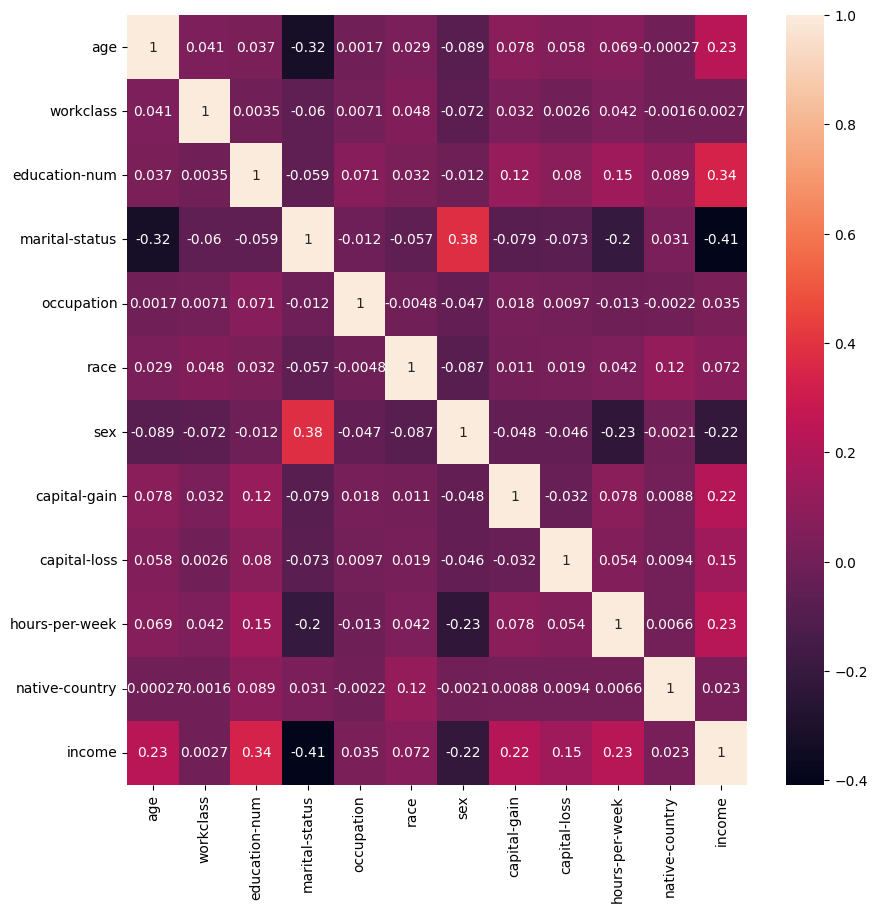

In [ ]:
# Menawhile lets plot correlation to see significant features

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

We can see "workclass", "race" and "native-country" doesn't have much correlation w.r.t. "income" variable. We can drop them if we want. Lets drop them from data.

In [ ]:
# Dropping above mentioned columns

data = data.drop(["workclass","race","native-country"], axis=1)

This is also good time to separate dependent and independent variables which we will use later to create train, test data.

In [ ]:
# Separating dependent and independent variable

X = data.drop("income", axis=1)
y = data["income"]

In [ ]:
# Chekcing the shape

print(X.shape)
print(y.shape)

(32561, 8)
(32561,)


Creating the Train and Test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(22792, 8)
(9769, 8)


In [ ]:
# Reviewing the dataset

X_train.head()

,age,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week
19749,34,9,0,4,1,0,2179,12
1216,48,10,0,2,0,7688,0,40
27962,23,10,0,9,0,0,0,30
23077,56,9,1,3,1,0,0,40
10180,17,7,1,8,1,0,0,9


Implementing standard scaling to scale the features

In [ ]:
# scaling the features using standard scalar

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# Checking the imbalance in training set and printing the scaled train set
print(y_train.value_counts())
X_train_scaled.head()

income
0    17265
1     5527
Name: count, dtype: int64


,age,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week
0,-0.334771,-0.423219,-0.988483,-0.533275,1.423243,-0.146349,5.136118,-2.309851
1,0.691223,-0.035377,-0.988483,-1.037241,-0.702621,0.929742,-0.219921,-0.031295
2,-1.140909,-0.035377,-0.988483,0.726640,-0.702621,-0.146349,-0.219921,-0.845065
3,1.277505,-0.423219,1.011651,-0.785258,1.423243,-0.146349,-0.219921,-0.031295
4,-1.580621,-1.198902,1.011651,0.474657,1.423243,-0.146349,-0.219921,-2.553982


Now, we will be training few models.

In [ ]:
# Lets start with Logistic regression
lr = LogisticRegression()

#Setting up parameters for hyper-parameter tuning
lr_params = {"penalty": ["l1", "l2", "elasticnet"],
         "C": [0.001, 0.01, 0.1, 1, 10, 100],
         "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
         "class_weight": [{0:w, 1:y} for w in [1,3, 6, 9, 12] for y in [1,3, 6, 9, 12]]}

#We will use stratified cross validation as data is imbalaced
cv = StratifiedKFold(n_splits=5)

In [ ]:
#We will use grid search CV to select the best hyper-parameters
lr_grid = GridSearchCV(lr, lr_params, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
lr_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
7500 fits failed out of a total of 13500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError:

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                          {0: 1, 1: 6}, {0: 1, 1: 9},
                                          {0: 1, 1: 12}, {0: 3, 1: 1},
                                          {0: 3, 1: 3}, {0: 3, 1: 6},
                                          {0: 3, 1: 9}, {0: 3, 1: 12},
                                          {0: 6, 1: 1}, {0: 6, 1: 3},
                                          {0: 6, 1: 6}, {0: 6, 1: 9},
                                          {0: 6, 1: 12}, {0: 9, 1: 1},
                                          {0: 9, 1: 3}, {0: 9, 1: 6},
                                          {0: 9, 1: 9}, {0: 9, 1: 12},
                                          {0: 12, 1: 1}, {0: 12, 1: 3},
                                          {0: 12, 1: 6}, {0: 12, 1: 9},
                                          {0: 12, 1: 12}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
#Lets see the best hyper-parameters selected by model

lr_grid.best_params_

{'C': 0.01, 'class_weight': {0: 3, 1: 3}, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
# Lets have prediction on test dataset

y_pred = lr_grid.predict(X_test_scaled)
# print(y_pred)

[0 0 1 ... 0 0 1]


In [ ]:
# Lets evaluate the models performance

score = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {score}\n")

print(f"classification report:\n{classification_report(y_test, y_pred)}")
print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy score : 0.8373426143924659

classification report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7455
           1       0.71      0.53      0.61      2314

    accuracy                           0.84      9769
   macro avg       0.79      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769

confusion matrix:
[[6949  506]
 [1083 1231]]


In [ ]:
# Lets also create ROC-AUC curve. For that, first we need to calculate probablities of each class

y_pred_prob = lr_grid.predict_proba(X_test_scaled)
print(y_pred_prob)

[[0.97754957 0.02245043]
 [0.80426897 0.19573103]
 [0.4187906  0.5812094 ]
 ...
 [0.97914566 0.02085434]
 [0.61813671 0.38186329]
 [0.07747367 0.92252633]]


In [ ]:
# plotting roc curve, we will focus on class with label 1

fpr,tpr,threshold = roc_curve(y_test, y_pred_prob[:,1])

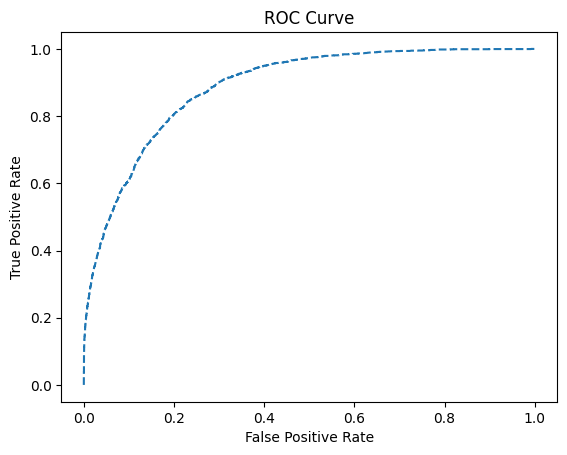

In [ ]:
plt.plot(fpr, tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# Calculating the roc auc score

model_roc_auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
print(model_roc_auc_score)

0.8878091365826767


## Conclusion
- This estimator is okay however we can try other algorithms as well such as Naive Bayes, SVM, Ensemble algorithms etc.
- We can experiment with more features to get the better result.
- Matrices such as recall and precision are based on threshold which is 0.5 by default, According to the business use case, we can set the threshold to focus more on Precision or Recall.

## <b>Thank You!